# Import useful packages

In [18]:
#!pip install ipympl
# importing sys
#!pip install wget
# download utilsLaris form github
import wget
import os
os. remove("utilsLaris.py")
wget.download("https://raw.githubusercontent.com/Ah-essabar/LARIS01/master/utilsLaris.py")

'utilsLaris.py'

In [19]:
help(utilsLaris)

Help on module utilsLaris:

NAME
    utilsLaris

FUNCTIONS
    dataFusion(dictSensors, salle=219)
        ## fusion des données par master and all
    
    outliersToNan(data)
    
    resampleSensors(dictSensors, period='5T')
    
    separteSensors(data, filename, save=False)
    
    seperateGrandeurs(df, grandeurs={'temperature': [], 'co2': [], 'humidity': [], 'sound': [], 'tvoc': []})
        Demonstrates triple double quotes
        docstrings and does nothing really.

FILE
    c:\users\ahmed\documents\sdsstage\sds-stage\s2\mesures polytech\mesuresambiance\utilslaris.py




In [1]:
import ipywidgets as widgets
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import utilsLaris
import os
os.environ['NUMEXPR_MAX_THREADS'] = '16'

# Import data

In [2]:
raw_data = pd.read_csv("extract.txt", sep=";")

## OutliersToNan

In [3]:
data,outliers = utilsLaris.outliersToNan(raw_data)

In [4]:
# Separate sensors and save as dictionary
filename = "Sensors219_280322"
# separteSensors(data, filename, save=False)
DataSensors = utilsLaris.separteSensors(data,filename, False )

#np.save(filename+'.npy', DataSensors) 

We have  14  sensors. Their Id are  [107, 106, 105, 104, 110, 109, 108, 103, 102, 101, 100, 112, 111, 113]
sensor_107
sensor_106
sensor_105
sensor_104
sensor_110
sensor_109
sensor_108
sensor_103
sensor_102
sensor_101
sensor_100
sensor_112
sensor_111
sensor_113


## Load separated data and re

In [5]:
filename = "Sensors219bis"
filename = filename+'.npy'
import numpy as np
dictionary = np.load(filename,allow_pickle='TRUE').item()

dictSensors = dictionary.copy()
dict = dictSensors .copy()
dictSensors = utilsLaris.resampleSensors(dictSensors,period='5T')
dict = dictSensors .copy()

## dataFusion

In [6]:
df1,df2,df3,df4,df = utilsLaris.dataFusion(dictSensors, salle = 219)

In [7]:
df1.iloc[1000:2000,:].describe()

,co2_100,tvoc_100,temperature_100,humidity_100,light_100,sound_100,co2_101,tvoc_101,temperature_101,humidity_101,...,temperature_102,humidity_102,light_102,sound_102,co2_103,tvoc_103,temperature_103,humidity_103,light_103,sound_103
count,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,...,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000
mean,422.061412,1136.240362,24.493657,28.821394,754.206414,509.736950,399.642784,597.205049,23.783838,29.672943,...,23.529317,30.529985,141.486196,510.269427,497.547716,412.265167,23.917800,29.835641,198.294990,510.854976
std,10.205746,63.590484,0.236883,1.741250,221.836101,0.295990,10.852720,57.930483,0.181021,1.799916,...,0.184129,1.895654,207.747332,0.288291,7.809685,45.708487,0.213960,2.000421,282.121065,0.250583
min,401.000000,1027.333333,24.120000,25.503333,435.666667,509.000000,374.500000,499.000000,23.540000,26.240000,...,23.200000,26.700000,0.000000,509.666667,477.666667,313.000000,23.576667,26.110000,0.000000,509.500000
25%,415.000000,1074.000000,24.303333,26.980000,536.000000,509.500000,391.500000,554.333333,23.650000,27.696667,...,23.400000,28.490000,0.000000,510.000000,492.000000,369.000000,23.760000,27.708750,0.000000,510.666667
50%,419.500000,1153.666667,24.433333,29.286667,694.000000,509.666667,398.333333,580.000000,23.730000,30.250000,...,23.485833,31.070833,0.000000,510.333333,497.666667,421.500000,23.850000,30.433333,0.000000,511.000000
75%,428.666667,1187.000000,24.645000,29.846667,1022.500000,510.000000,406.500000,646.333333,23.880000,30.860000,...,23.630000,31.655000,330.833333,510.500000,503.333333,448.000000,24.046667,31.138750,500.083333,511.000000
max,452.333333,1277.333333,25.180000,32.973333,1023.000000,511.000000,431.500000,763.000000,24.326667,33.750000,...,24.080000,35.425000,618.000000,511.000000,516.000000,524.000000,24.573333,34.365000,755.333333,511.666667


In [8]:
#ax = df1.iloc[100:2000,:].plot(figsize=(15, 6))
dataMaster = df.copy()
colonnesNames = utilsLaris.seperateGrandeurs(dataMaster)
list(colonnesNames.keys())

['temperature', 'co2', 'humidity', 'sound', 'tvoc']

['co2_100', 'co2_101', 'co2_102', 'co2_103', 'co2_104', 'co2_105', 'co2_106', 'co2_107', 'co2_108', 'co2_109', 'co2_110', 'co2_111', 'co2_112', 'co2_113']


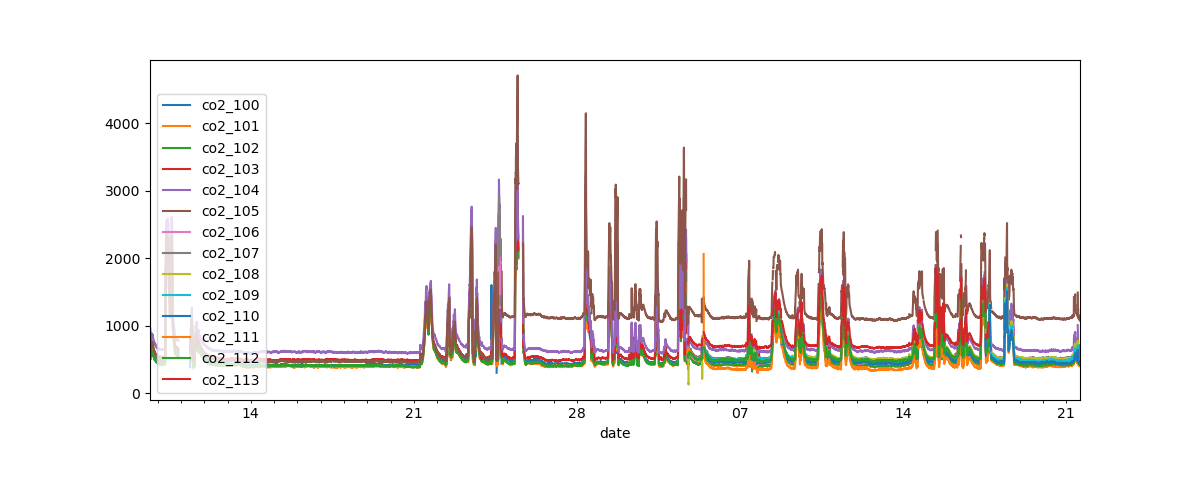

In [21]:
colonnesName = colonnesNames['co2']
print(colonnesName)
ax = dataMaster.loc[:,colonnesName].iloc[100:,:].plot(figsize=(12, 5)) 
# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.legend(loc='lower left')
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()
plt.show()

In [12]:
colonnesNames
targets = ["co2", "temperature"]
result = [colonnesNames[key] for key in colonnesNames.keys() if key in targets]

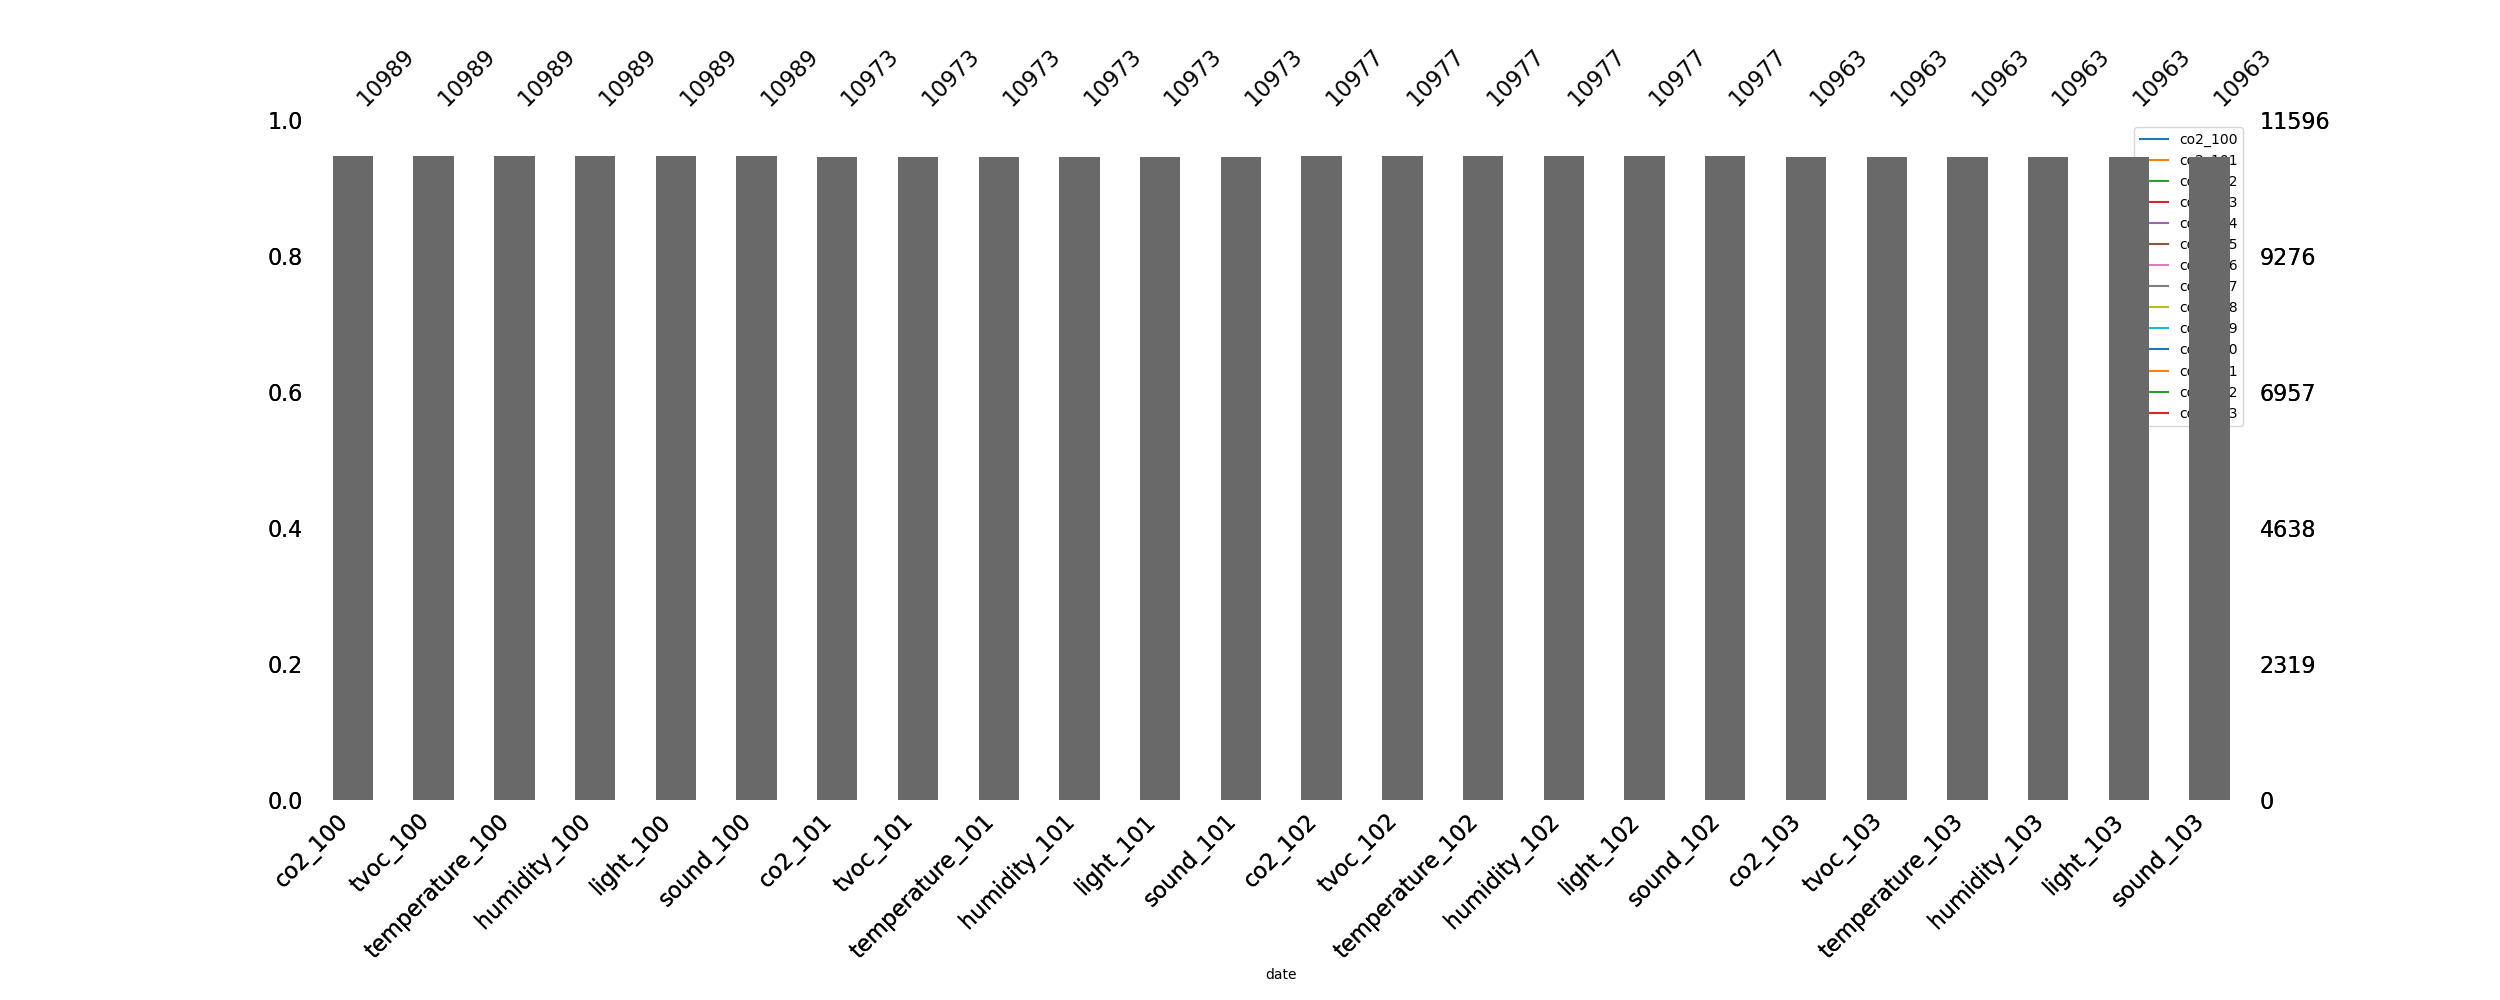

In [25]:
#visualize data 
#!pip install missingno
# Import missingno as msno
import missingno as msno
import matplotlib.pyplot as plt

# Plot amount of missingness
msno.bar(df1) # you can see pandas-profilin count part

plt.show()

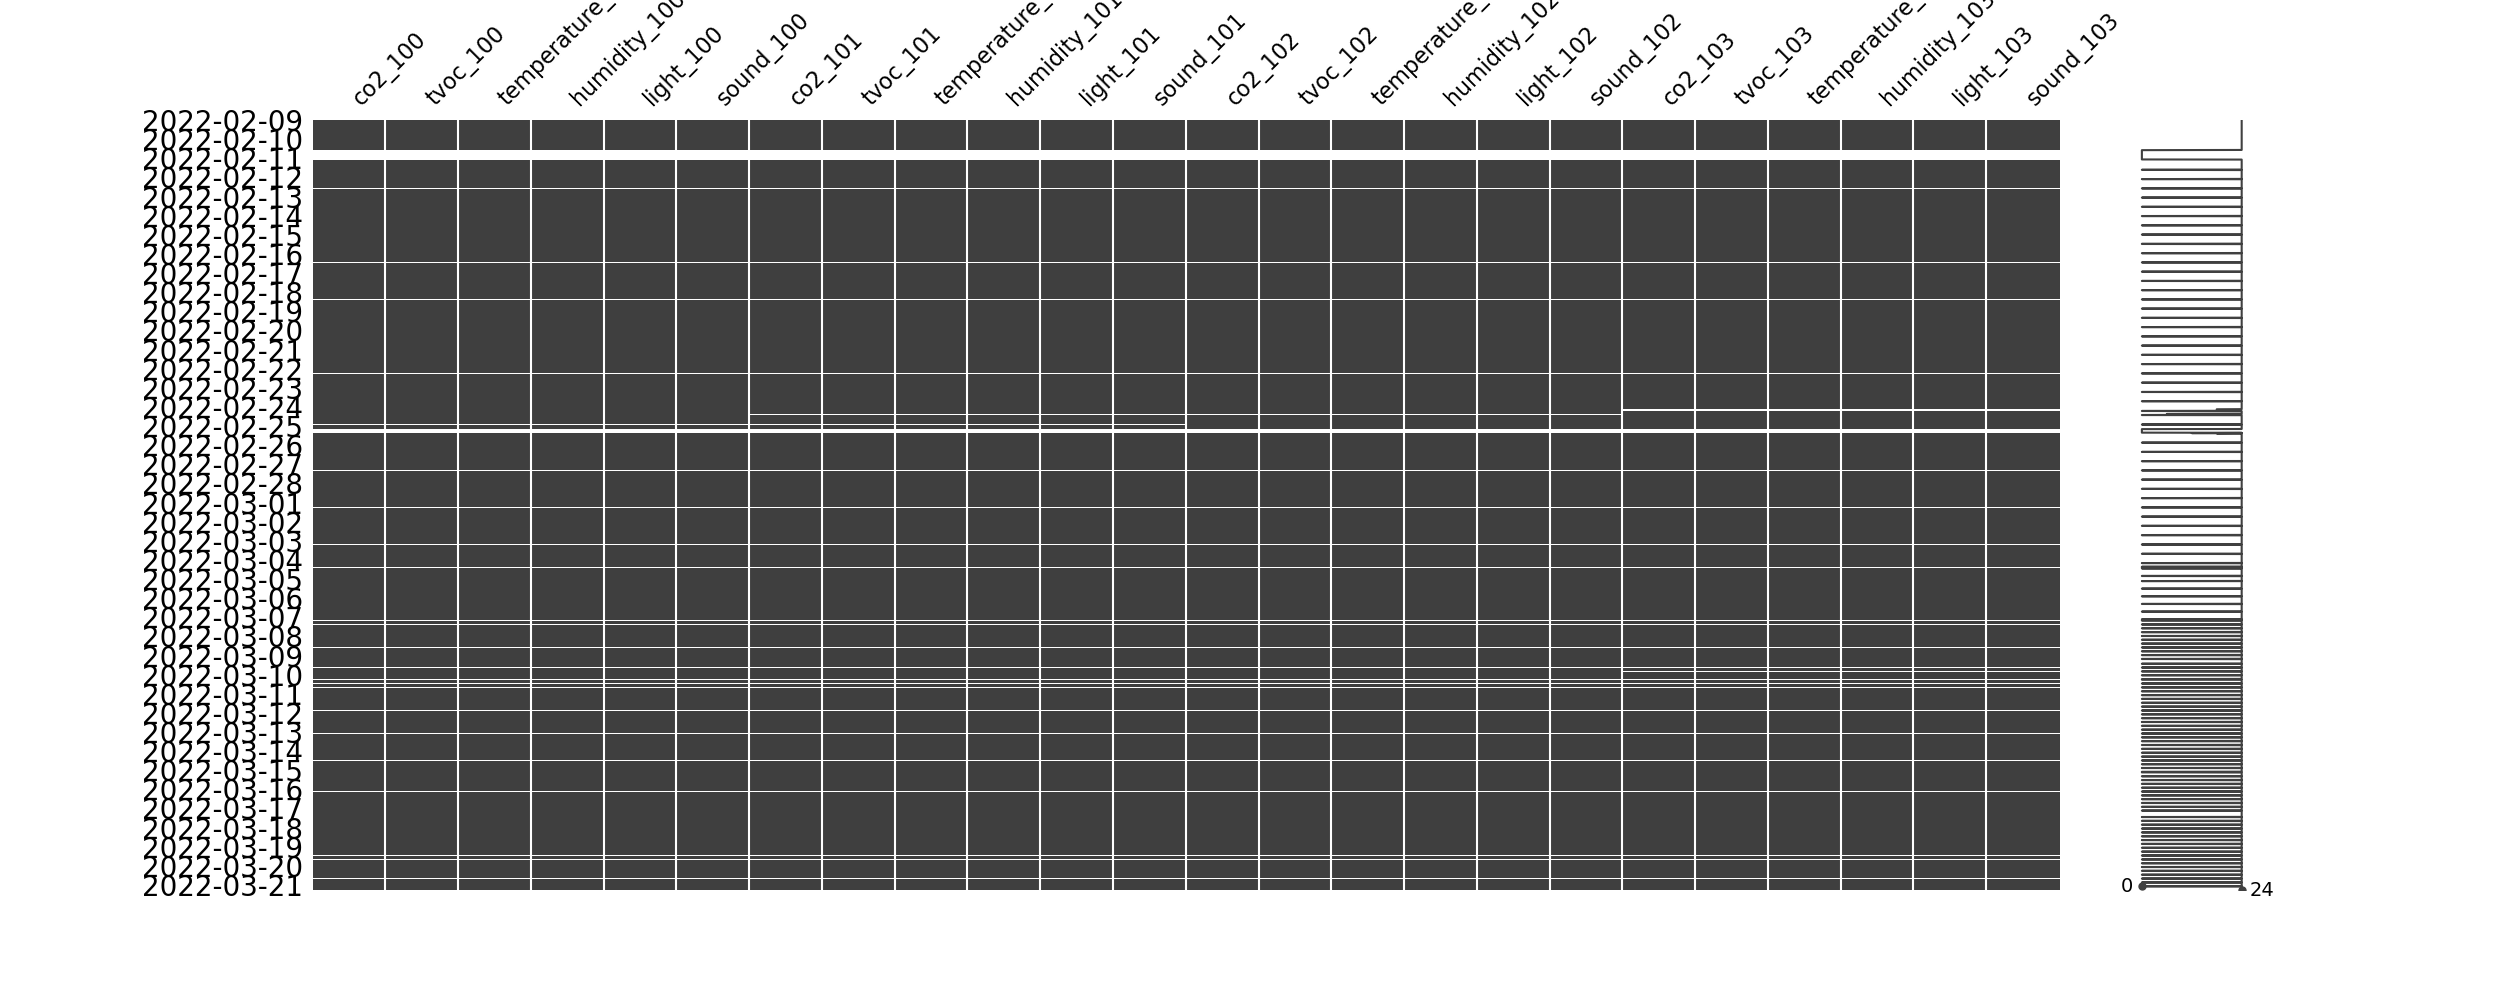

In [32]:
# Plot nullity matrix of airquality with frequency 'M'
msno.matrix(df1, freq='D') # this part actually displays the missingness types, also more visible version of pandas-profiling matrix.
plt.show()

In [16]:
data.iloc[outliers,:]

,id,date,room,sensor,co2,tvoc,temperature,humidity,light,sound
2355,358866,21/03/2022 08:45:07,S219,105,1393.0,NaN,25.43,31.04,313.0,512.0
2359,358862,21/03/2022 08:43:37,S219,105,1395.0,NaN,25.41,31.16,319.0,511.0
2363,358858,21/03/2022 08:42:07,S219,105,1394.0,NaN,25.41,31.25,321.0,512.0
2406,358770,21/03/2022 08:39:07,S219,105,1419.0,NaN,25.34,31.29,322.0,511.0
2410,358766,21/03/2022 08:37:37,S219,105,1389.0,NaN,25.35,31.42,319.0,514.0
...,...,...,...,...,...,...,...,...,...,...
313126,1095,09/02/2022 11:22:03,S219,104,1157.0,165.0,NaN,NaN,NaN,NaN
313162,1059,09/02/2022 11:11:03,S219,104,1224.0,177.0,24.94,31.48,255.0,NaN
313246,975,09/02/2022 10:45:23,S219,104,1086.0,119.0,24.86,30.84,255.0,NaN
313360,449,09/02/2022 10:10:33,S219,104,1102.0,213.0,24.83,NaN,NaN,NaN


In [27]:
data.describe()

,id,sensor,co2,tvoc,temperature,humidity,light,sound
count,313809.000000,313809.000000,313759.000000,313258.000000,313659.000000,313621.000000,313475.000000,313421.000000
mean,160849.764592,105.089523,663.345756,550.042167,24.945529,29.741726,223.060598,491.681320
std,96298.274046,3.833041,512.250276,810.896315,1.524204,4.624068,381.964966,176.363454
min,1.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,78899.000000,102.000000,462.000000,99.000000,24.340000,26.980000,0.000000,509.000000
50%,157635.000000,104.000000,524.000000,251.000000,24.930000,29.750000,8.000000,511.000000
75%,236087.000000,108.000000,709.000000,638.000000,25.620000,33.000000,440.000000,512.000000
max,362981.000000,113.000000,65289.000000,9963.000000,30.290000,60.350000,33023.000000,1023.000000


In [6]:
data.describe()

,id,sensor,co2,tvoc,temperature,humidity,light,sound
count,313809.000000,313809.000000,313728.000000,313258.000000,313659.000000,313621.000000,313475.000000,313421.000000
mean,160849.764592,105.089523,659.690726,550.042167,24.945529,29.741726,223.060598,491.681320
std,96298.274046,3.833041,336.010257,810.896315,1.524204,4.624068,381.964966,176.363454
min,1.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,78899.000000,102.000000,462.000000,99.000000,24.340000,26.980000,0.000000,509.000000
50%,157635.000000,104.000000,524.000000,251.000000,24.930000,29.750000,8.000000,511.000000
75%,236087.000000,108.000000,709.000000,638.000000,25.620000,33.000000,440.000000,512.000000
max,362981.000000,113.000000,4834.000000,9963.000000,30.290000,60.350000,33023.000000,1023.000000


In [13]:
from sklearn.ensemble import IsolationForest
X =x.iloc[:,0:]

clf = IsolationForest(random_state=0).fit(X)
y=clf.predict(X)

In [12]:
x = data.iloc[:,4:]

x= x[~np.isnan(x).any(axis=1)]

In [76]:
y.sum()

245934

# Detect outliersset_index

In [78]:
filt_df= raw_data.copy()
low = .05
high = .95
quant_df = filt_df.quantile([low, high])
print(quant_df)


            id  sensor     co2    tvoc  temperature  humidity  light   sound
0.05   16103.4   100.0   399.0     7.0        23.27     21.91    0.0     9.0
0.95  329870.6   112.0  1286.0  2357.0        27.14     36.89  721.0  1011.0


C:\Users\master\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='co2'>

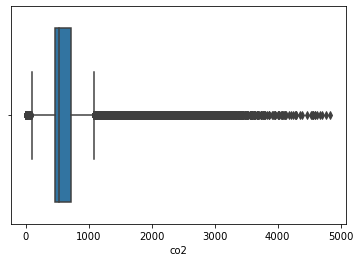

In [16]:
sns.boxplot(raw_data['co2'])

In [16]:
a=raw_data['co2']>10000
a.sum()

31

In [21]:
data["co2"].max()

65289.0

## deal with outliers?

In [19]:
raw_data.drop(outliers, inplace = True)
print(len(raw_data))


313122


In [29]:
raw_data.drop(['id'], axis=1).head()

,date,room,sensor,co2,tvoc,temperature,humidity,light,sound
0,21/03/2022 14:25:13,S219,107,507,67,24.57,31.46,548,511
1,21/03/2022 14:25:03,S219,106,443,68,24.57,31.57,427,507
2,21/03/2022 14:24:53,S219,105,1087,167,24.78,31.34,494,511
3,21/03/2022 14:24:43,S219,104,620,51,24.87,31.33,623,512
4,21/03/2022 14:23:43,S219,107,506,52,24.55,31.50,552,510


# Separate sensors

## Data fusion 

In [45]:
## fusion des données par master and all
dfs =[dict['sensor_100'],dict['sensor_101'],dict['sensor_102'], dict['sensor_103']]
df1 = dfs[0].join(dfs[1:])
dfs =[dict['sensor_104'],dict['sensor_105'],dict['sensor_106'], dict['sensor_107']]
df2 = dfs[0].join(dfs[1:])
dfs =[dict['sensor_108'],dict['sensor_109'],dict['sensor_110']]
df3 = dfs[0].join(dfs[1:])
dfs =[dict['sensor_111'],dict['sensor_112'],dict['sensor_113']]
df4 = dfs[0].join(dfs[1:])
dfs = [df1,df2,df3,df4]
df = dfs[0].join(dfs[1:])

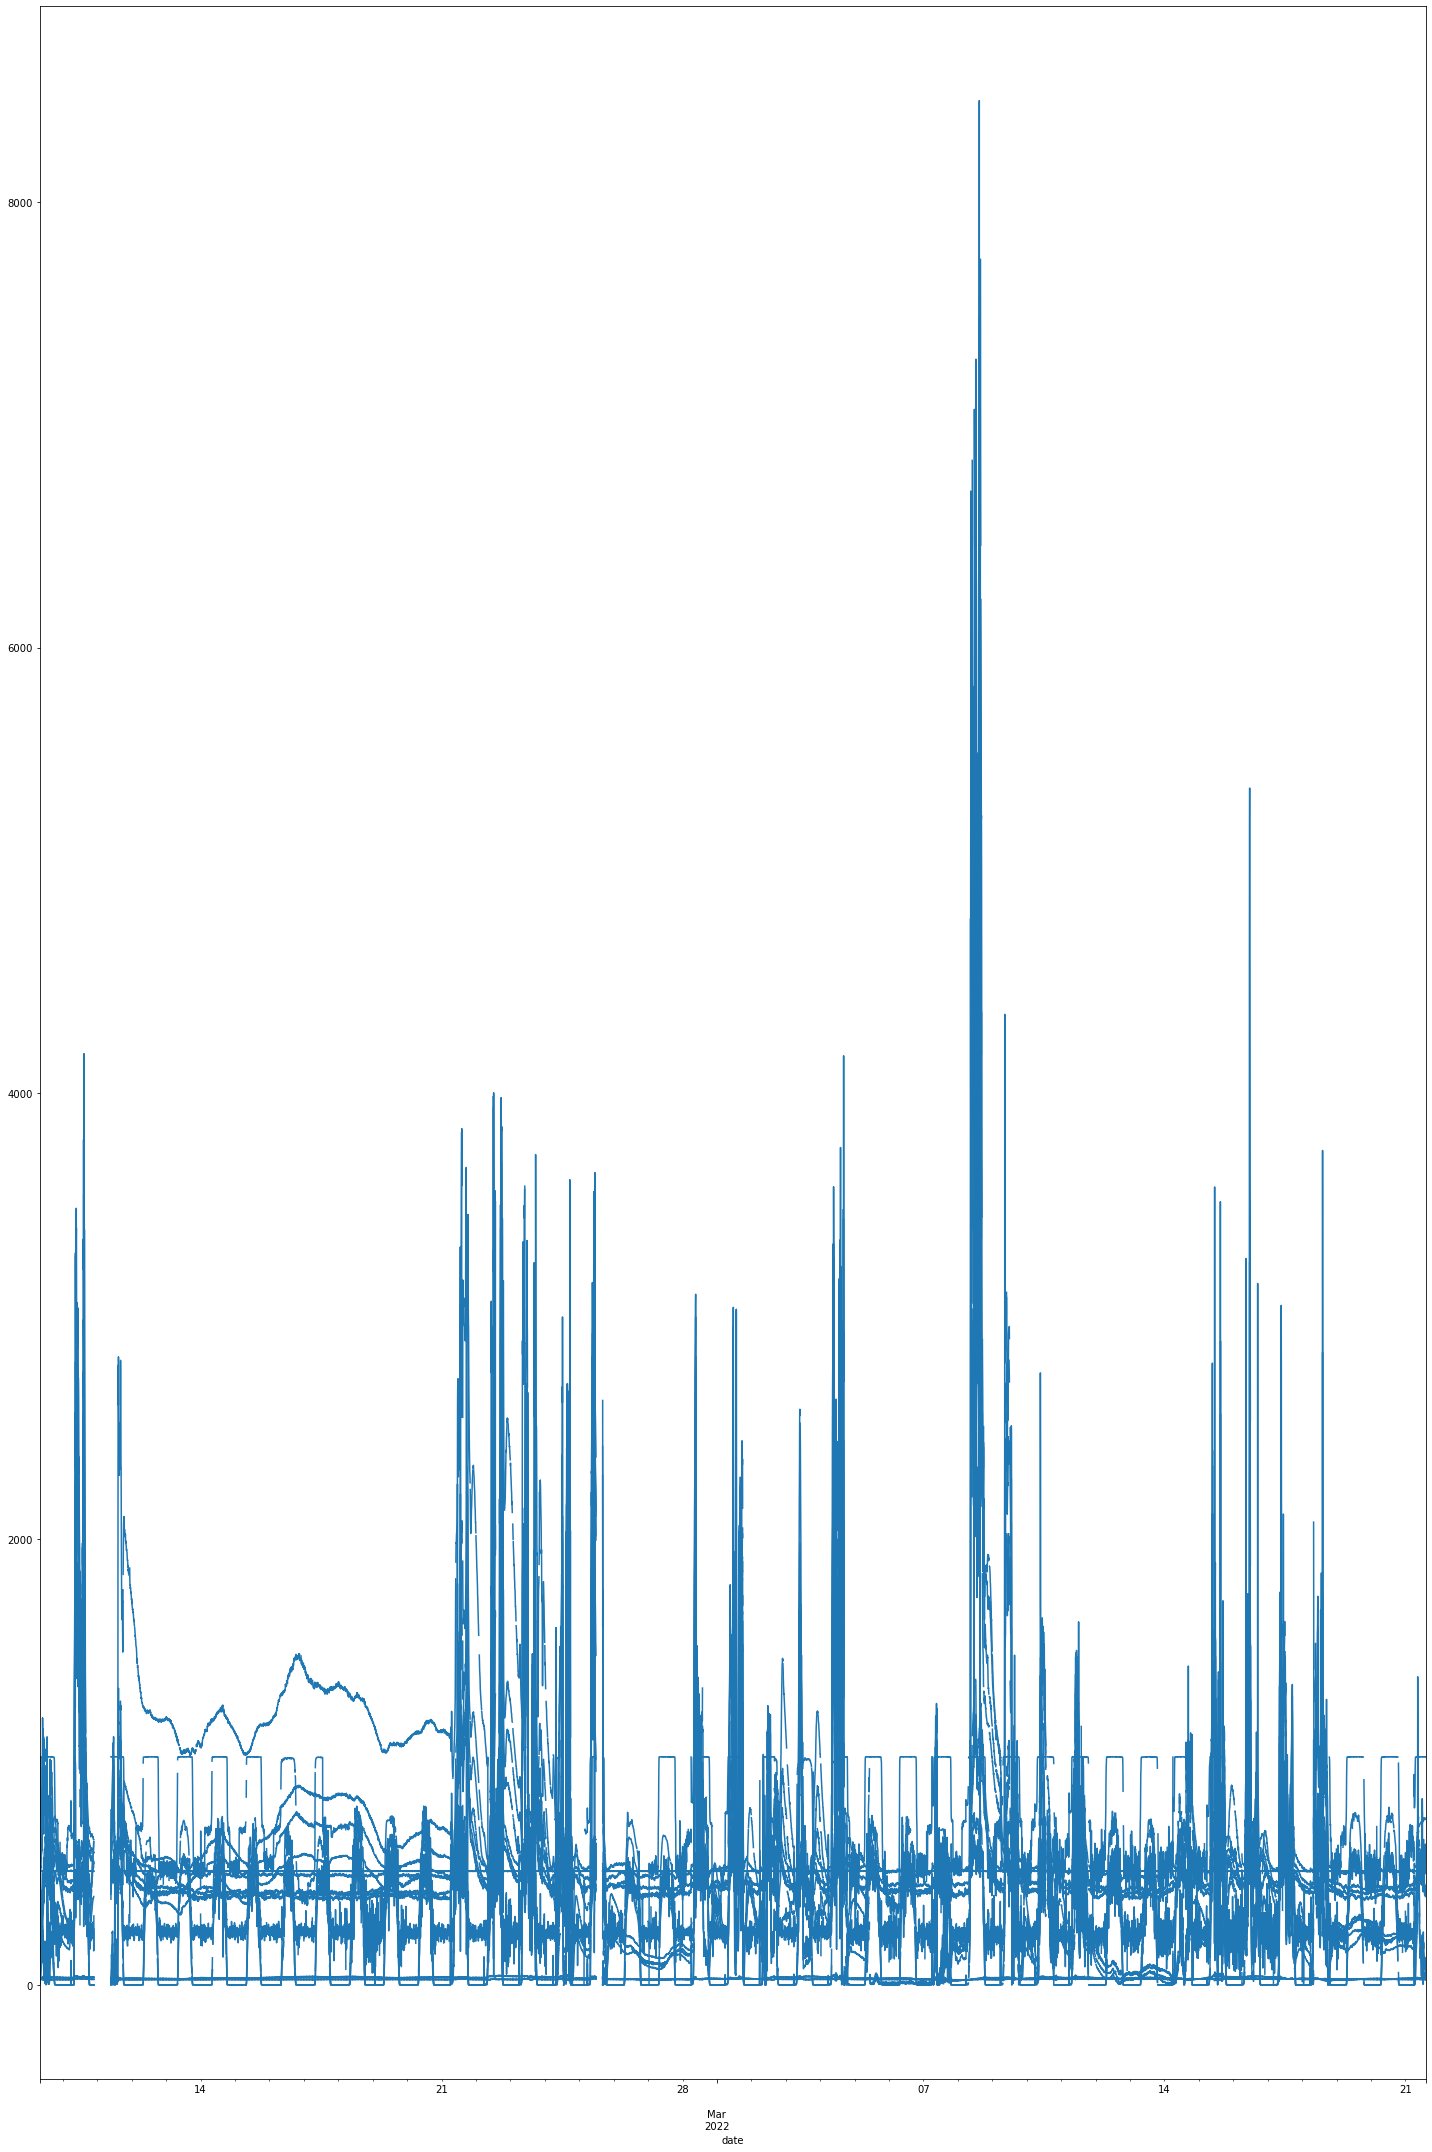

In [46]:
dfs = [df1,df2,df3,df4]
dfs = [df1]
for df in dfs :    
    df.resample('2H').plot(figsize=(20, 30), subplots=True)

# Analyse measured data

In [13]:
corr = raw_data.corr()
corr

,id,sensor,co2,tvoc,temperature,humidity,light,sound
id,1.000000,0.324379,0.016087,-0.230451,0.316584,-0.186467,-0.025811,0.036051
sensor,0.324379,1.000000,0.056038,-0.136411,0.197886,-0.122700,-0.295595,0.175360
co2,0.016087,0.056038,1.000000,0.384276,0.427614,0.185503,0.195979,0.044872
tvoc,-0.230451,-0.136411,0.384276,1.000000,0.088187,0.247642,0.153040,-0.001005
temperature,0.316584,0.197886,0.427614,0.088187,1.000000,0.187113,0.120714,0.063187
humidity,-0.186467,-0.122700,0.185503,0.247642,0.187113,1.000000,0.015199,0.007550
light,-0.025811,-0.295595,0.195979,0.153040,0.120714,0.015199,1.000000,0.064373
sound,0.036051,0.175360,0.044872,-0.001005,0.063187,0.007550,0.064373,1.000000


sns.pairplot(sensor_100.drop(["id","date","room","sensor"],axis=1), hue="co2")

<AxesSubplot:xlabel='sensor', ylabel='temperature'>

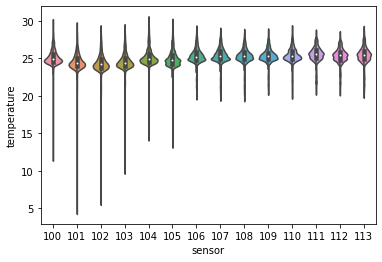

In [14]:
sns.violinplot(x="sensor", y="temperature", data=raw_data)

<AxesSubplot:xlabel='sensor', ylabel='co2'>

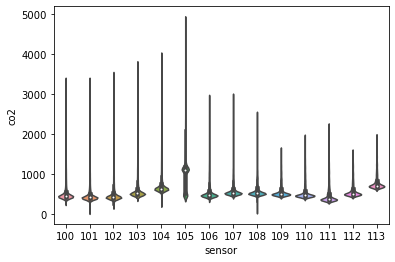

In [15]:
sns.violinplot(x="sensor", y="co2", data=raw_data)

<AxesSubplot:xlabel='sensor', ylabel='tvoc'>

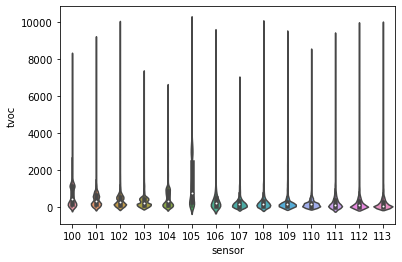

In [16]:
sns.violinplot(x="sensor", y="tvoc", data=raw_data)

<AxesSubplot:xlabel='sensor', ylabel='humidity'>

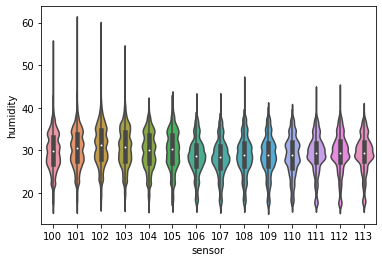

In [17]:
sns.violinplot(x="sensor", y="humidity", data=raw_data)

<AxesSubplot:xlabel='sensor', ylabel='light'>

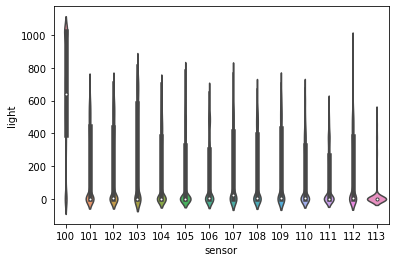

In [18]:
sns.violinplot(x="sensor", y="light", data=raw_data)

<AxesSubplot:xlabel='sensor', ylabel='sound'>

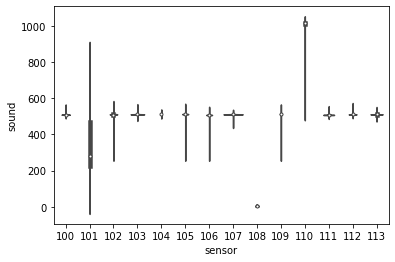

In [19]:
sns.violinplot(x="sensor", y="sound", data=raw_data)

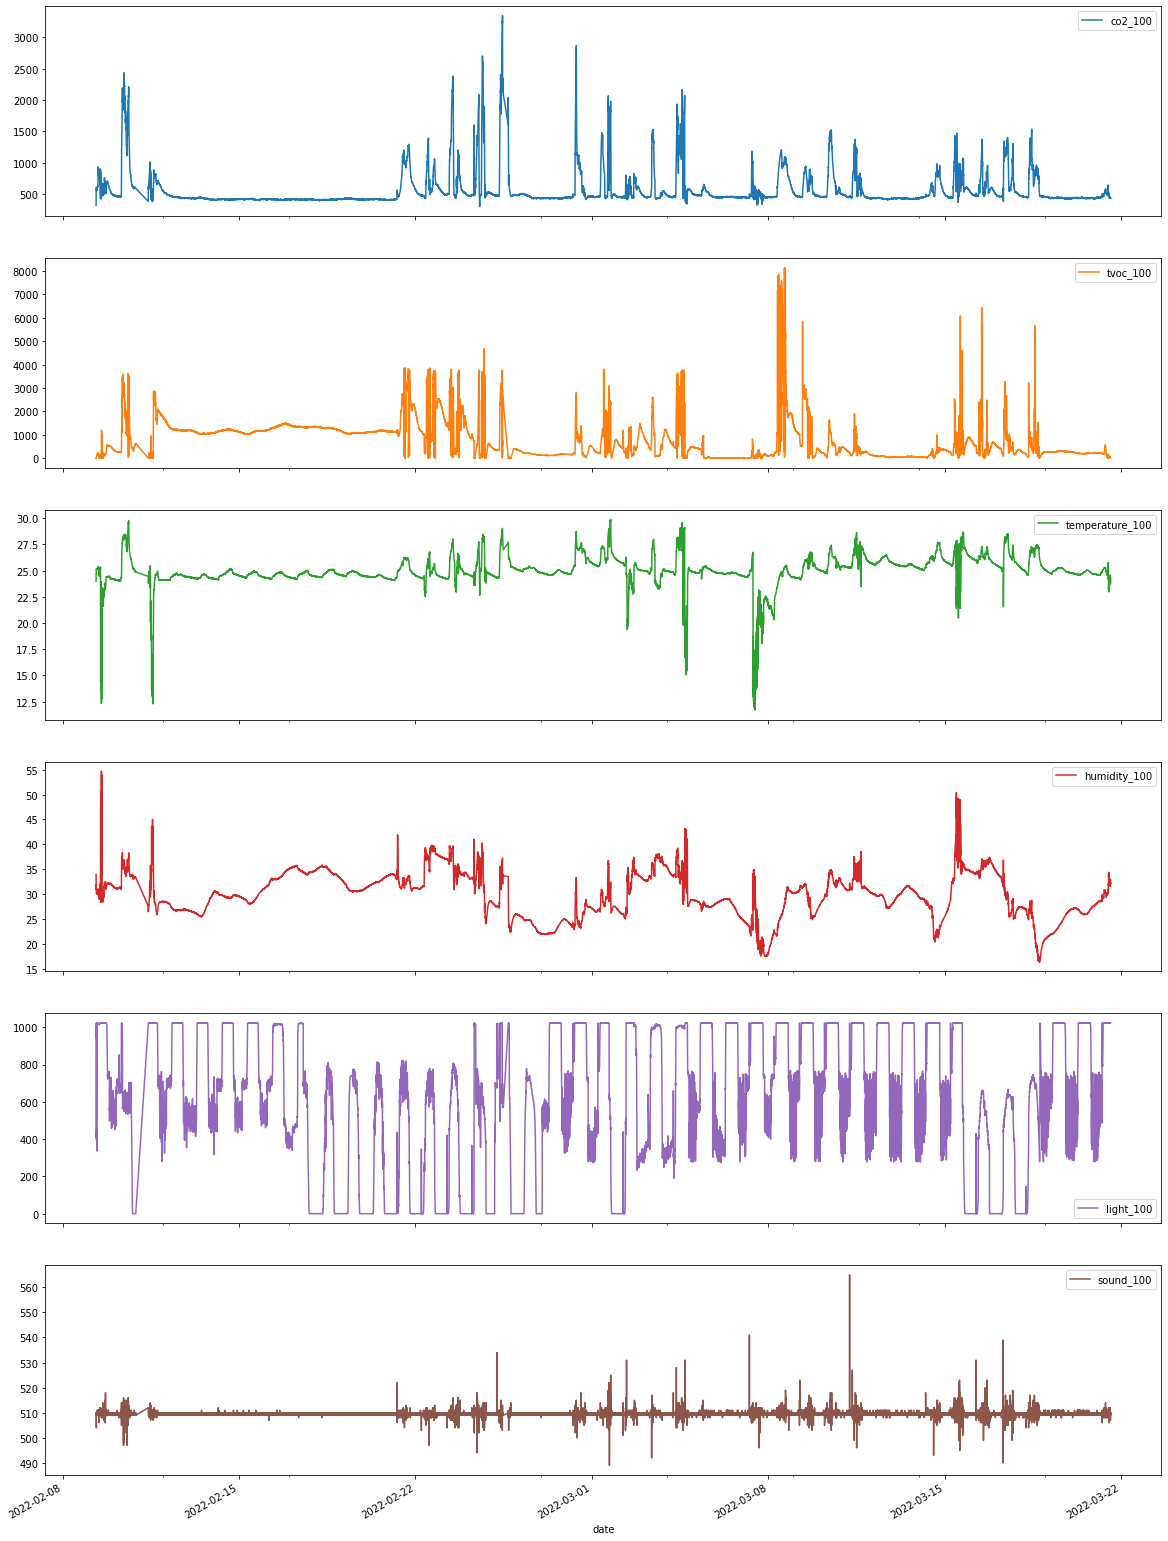

In [20]:
# for sensor 100
axs = sensor_100.plot(figsize=(20, 30), subplots=True)

In [7]:
# Compare data from all sensors
import ipywidgets as widgets
%matplotlib widget

excluded_sensors = [105,106,107]
sensors_list_updated = np.delete(sensors_list, [np.where(sensors_list == i) for i in excluded_sensors])
print("Sensors to display : ",sensors_list_updated)

values = ["co2","tvoc","temperature","humidity" ,"light","sound"]
units  = ["ppm","ppb","°C","%","-","-"]

hours = mdates.HourLocator(interval = 2)
h_fmt = mdates.DateFormatter('%H:%M')
days = mdates.DayLocator(interval=5)
d_fmt = mdates.DateFormatter('%Y-%m-%d')

for i,i_value in enumerate(values):
    fig, ax = plt.subplots(figsize=(20,10))
    
    for i_sensor in sensors_list_updated : 
        globals()['ax_%s' % i_sensor] = pd.Series(globals()['sensor_%s' % i_sensor][i_value+'_'+str(i_sensor)]).plot(grid=True, 
                                                                                                   label=str(i_sensor))
    
    plt.ylabel((i_value+" "+units[i]), fontsize=14)
    plt.xlabel('Time', fontsize=14)
    plt.title(i_value, fontsize=16)    
    ax.xaxis.set_minor_locator(hours)
    ax.xaxis.set_minor_formatter(h_fmt)
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(d_fmt)
    ax.get_xaxis().set_tick_params(which='major', pad=15) #major locator under minor
    plt.legend(loc="upper left")

    #display plot
    plt.show()

NameError: name 'sensors_list' is not defined

NameError: name 'sensor_100' is not defined

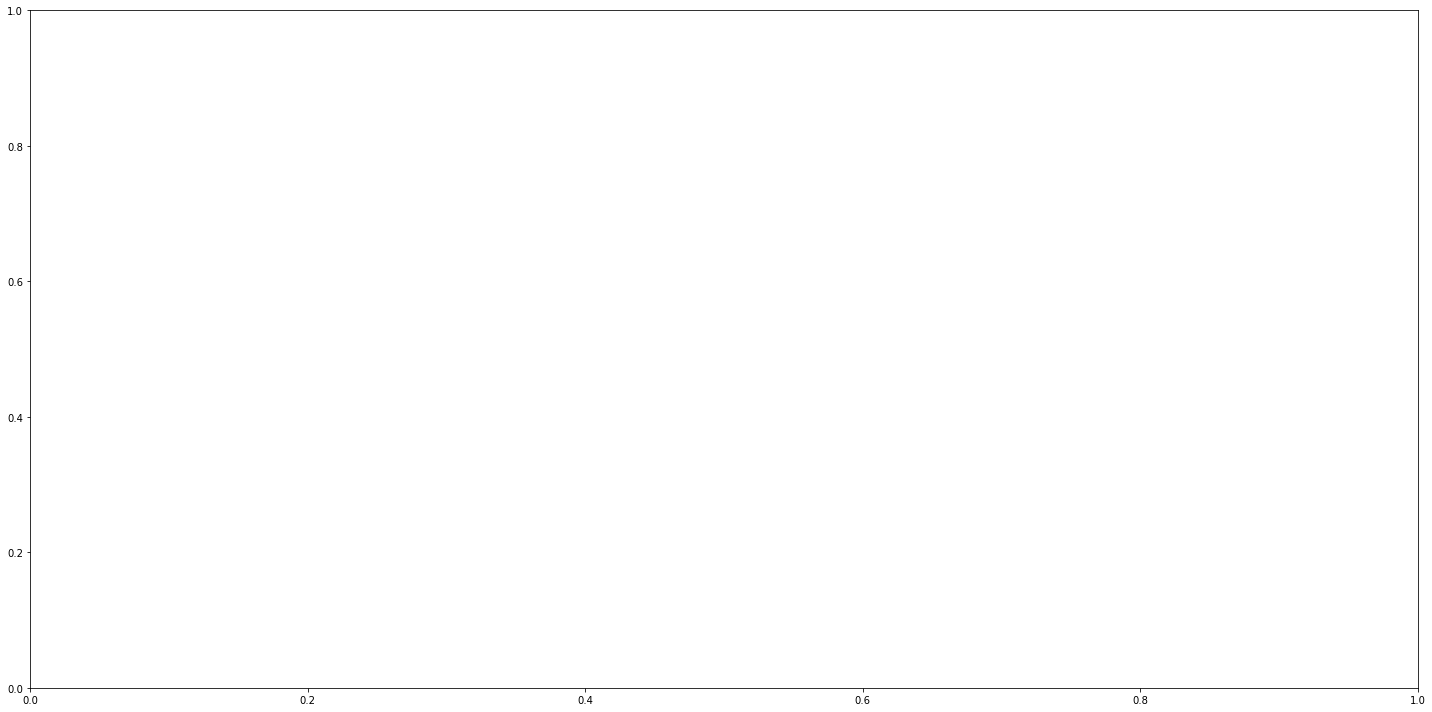

In [35]:
# Verif bonne prise en compte des dates
i_value = "temperature"
fig, ax = plt.subplots(figsize=(20,10))
df1 = pd.Series(sensor_100[i_value+'_100'])[0:5000]
df2 = pd.Series(sensor_101[i_value+'_101'])[5000:10000]

ax1 = df1.plot(grid=True, label='100')
ax2 = df2.plot(grid=True, label='101')

plt.ylabel((i_value+" "+units[i]), fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title(i_value, fontsize=16)
    
ax.xaxis.set_minor_locator(hours)
ax.xaxis.set_minor_formatter(h_fmt)
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.get_xaxis().set_tick_params(which='major', pad=15) #major locator under minor
plt.legend(loc="upper left")

plt.show()

In [332]:
print(sensor_100.shape, sensor_101.shape)

(32448, 9) (32399, 9)


In [333]:
sensor_103.id

date
2022-03-21 14:09:18    362801
2022-03-21 14:07:48    362797
2022-03-21 14:06:18    362793
2022-03-21 14:04:48    362789
2022-03-21 14:03:18    362785
                        ...  
2022-02-09 08:02:02        28
2022-02-09 07:56:59        22
2022-02-09 07:55:09        16
2022-02-09 07:53:19        10
2022-02-09 07:51:29         4
Name: id, Length: 32349, dtype: int64

In [51]:
# fusion de des capteurs
sensor_100.sort_index(inplace=True)
sensor_101.sort_index(inplace=True)
sensor_101_ = sensor_100.copy()
sensor_100_ = sensor_100.copy()
print("before", sensor_100_.shape,sensor_101_.shape, sensor_100_.co2_100.isnull().sum())
sensor_100_ = sensor_100_.resample('5T').mean()
sensor_101_ = sensor_101_.resample('5T').mean()
print("After", sensor_100_.shape,sensor_101.shape, sensor_100_.co2_100.isnull().sum())
df_inner = sensor_100_.merge(sensor_101_, how='left', left_index=True, right_index=True)
df_inner.shape

before (32448, 6) (32448, 6) 0
After (11596, 6) (32399, 6) 607


(11596, 12)

In [48]:
sensor_100_

<ipython-input-362-e3312272993a>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sensor_100_['2022-03-02'].co2.plot()


<AxesSubplot:xlabel='date'>

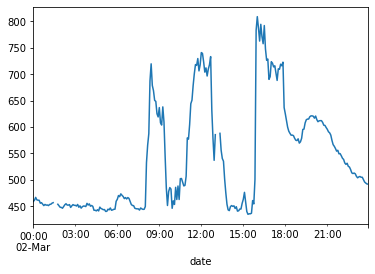

In [362]:
sensor_100_['2022-03-02'].co2.plot()

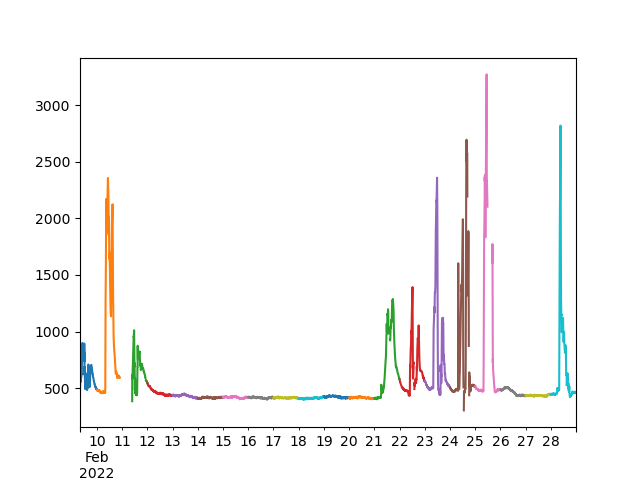

In [443]:
import ipywidgets as widgets
%matplotlib widget
sensor_100_.loc['2022-02', 'co2'].resample('D').plot()
plt.show()

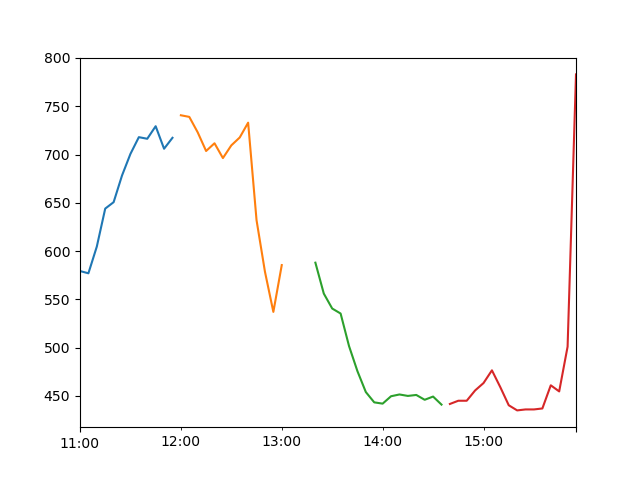

In [440]:
import matplotlib.pyplot as plt

import ipywidgets as widgets
%matplotlib widget

sensor_100_.loc['2022-03-02 11':'2022-03-02 15', 'co2'].resample('1.33H').plot()
plt.show()

In [359]:
sensor_100.sort_index(inplace=True)
y=sensor_100.index
ydif=y[1:]-y[:-1]
ydif.min()

Timedelta('0 days 00:00:27')

In [363]:
ydif.max()
hawks = sensor_100_

<Figure size 720x432 with 0 Axes>

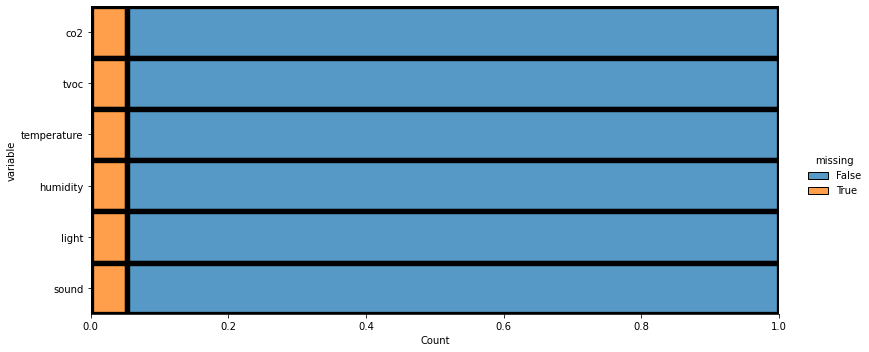

In [370]:
plt.figure(figsize=(10,6))
sns.displot(
    data=hawks.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [376]:

ydif=y[1:]-y[:-1]
ydif.min()

Timedelta('0 days 00:05:00')

In [377]:
ydif.max()

Timedelta('0 days 00:05:00')

In [ ]:
for i in range(1150):
    print(sensor_100_[['co2', 'temperature','humidity']][i*10:(i+1)*10])

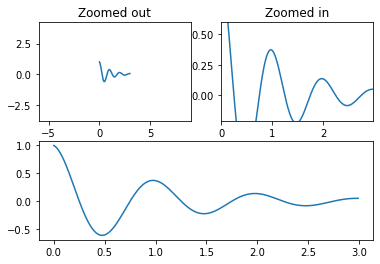

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


t1 = np.arange(0.0, 3.0, 0.01)

ax1 = plt.subplot(212)
ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.plot(t1, f(t1))

ax2 = plt.subplot(221)
ax2.margins(2, 2)           # Values >0.0 zoom out
ax2.plot(t1, f(t1))
ax2.set_title('Zoomed out')

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(t1, f(t1))
ax3.set_title('Zoomed in')

plt.show()

In [44]:
# fusion de des capteurs
sensor_100.sort_index(inplace=True)
sensor_101.sort_index(inplace=True)
sensor_101_ = sensor_101.drop(['id','room','sensor'],axis=1)
sensor_100_ = sensor_100.drop(['id','room','sensor'],axis=1)
print("before", sensor_100_.shape,sensor_101_.shape, sensor_100_.co2.isnull().sum())
sensor_100_ = sensor_100_.resample('5T').mean()
sensor_101_ = sensor_101_.resample('5T').mean()
print("After", sensor_100_.shape,sensor_101.shape, sensor_100_.co2.isnull().sum())
df_inner = sensor_100_.merge(sensor_101_, how='left', left_index=True, right_index=True)
df_inner.shape

NameError: name 'sensor_100_' is not defined

In [101]:
# Importing
import sklearn

import pandas as pd
 
# Load the dataset

bos_hou = raw_data.copy()

 
# Create the dataframe
column_name = bos_hou.columns
df_boston = bos_hou
df_boston.columns = column_name
print(df_boston.head())
 
''' Detection '''
# IQR
Q1 = np.percentile(df_boston['co2'], 5,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_boston['co2'], 95,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_boston.shape)
 
# Upper bound
upper = np.where(df_boston['co2'] >= (Q3+5*IQR))
# Lower bound
lower = np.where(df_boston['co2'] <= (Q1-2*IQR))
 
''' Removing the Outliers '''
df_boston.drop(upper[0], inplace = True)
df_boston.drop(lower[0], inplace = True)
 
print("New Shape: ", df_boston.shape)

       id                 date  room  sensor   co2  tvoc  temperature  \
0  362981  21/03/2022 14:25:13  S219     107   507    67        24.57   
1  362980  21/03/2022 14:25:03  S219     106   443    68        24.57   
2  362979  21/03/2022 14:24:53  S219     105  1087   167        24.78   
3  362978  21/03/2022 14:24:43  S219     104   620    51        24.87   
4  362977  21/03/2022 14:23:43  S219     107   506    52        24.55   

   humidity  light  sound  
0     31.46    548    511  
1     31.57    427    507  
2     31.34    494    511  
3     31.33    623    512  
4     31.50    552    510  
Old Shape:  (313809, 10)
New Shape:  (313728, 10)


In [102]:
df_boston.max()

id                          362981
date           28/02/2022 23:59:55
room                          S219
sensor                         113
co2                           4834
tvoc                         65535
temperature                 655.35
humidity                    655.35
light                        65535
sound                        65535
dtype: object

In [30]:
help(utilsLaris.seperateGrandeurs)

print (utilsLaris.seperateGrandeurs.__doc__)

Help on function seperateGrandeurs in module utilsLaris:

seperateGrandeurs(df, grandeurs={'temperature': [], 'co2': [], 'humidity': [], 'sound': [], 'tvoc': []})
    Demonstrates triple double quotes
    docstrings and does nothing really.

Demonstrates triple double quotes
    docstrings and does nothing really.
